# Testing Python tight-binding

In [2]:
%matplotlib notebook

import pathlib
from scipy import interpolate as interp
import pythtb as pytb

import sim_tb as stb
import toy_model_CrAs2 as toy

In [3]:
#path = pathlib.Path("tests/")
t = 1.0
alpha = 0.2
beta = 0.2
h = 0.1
path = toy.create_path_toy_model(t, alpha, beta, h)
toy.create_hoppings_toy_model(path, t, alpha, beta, h)
Sim = stb.Simulation_TB(path)

<IPython.core.display.Javascript object>


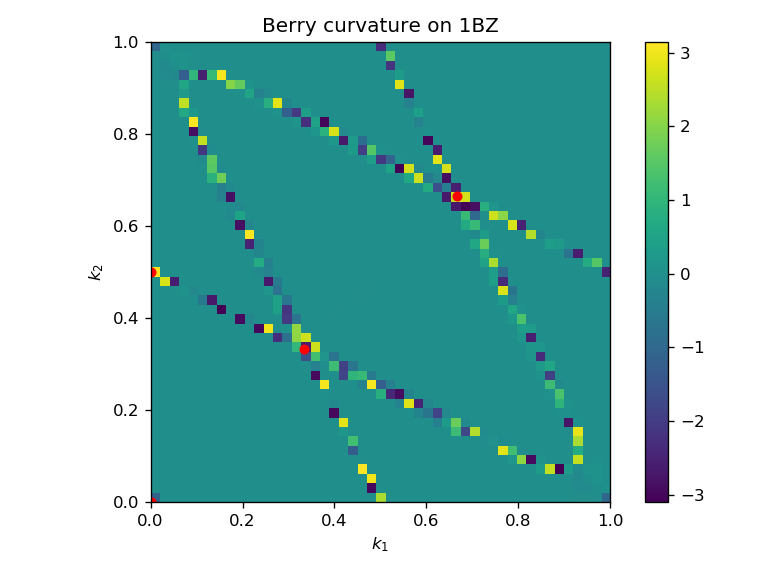

In [4]:

# Sim.model.display()
index_band = 4
berry_curv = Sim.berry_flux([index_band], nk=50)
fig, ax = plt.subplots()
Sim.plot_berry_flux(berry_curv, fig, ax)
fig.tight_layout()
fig.savefig("Berry_curv_band_{}.png".format(index_band))
plt.show()


In [7]:
np.shape(berry_curv)

(499, 499)

<IPython.core.display.Javascript object>


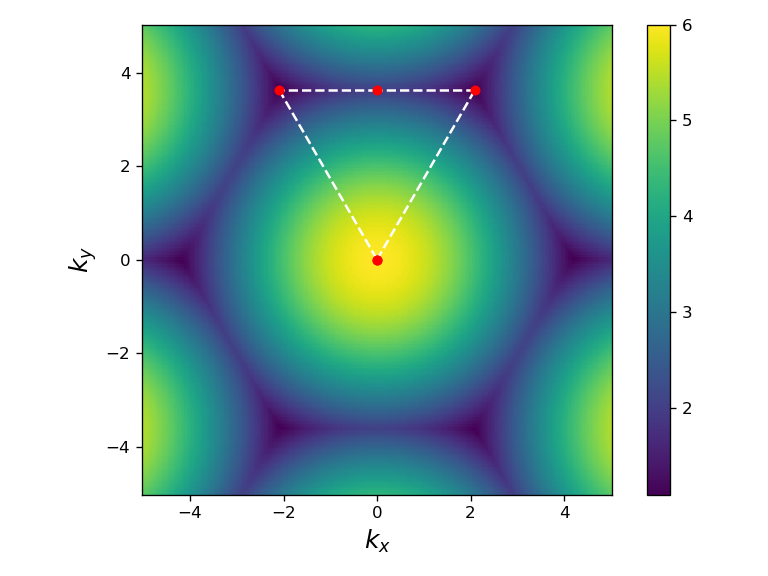

In [5]:
index_band = 7
fig2, ax2 = plt.subplots()
Sim.plot_bands_2d(index_band, fig=fig2,ax=ax2, nk=200)
fig2.tight_layout()
fig2.savefig("tests/band_{}.png".format(index_band))
plt.show()

<IPython.core.display.Javascript object>


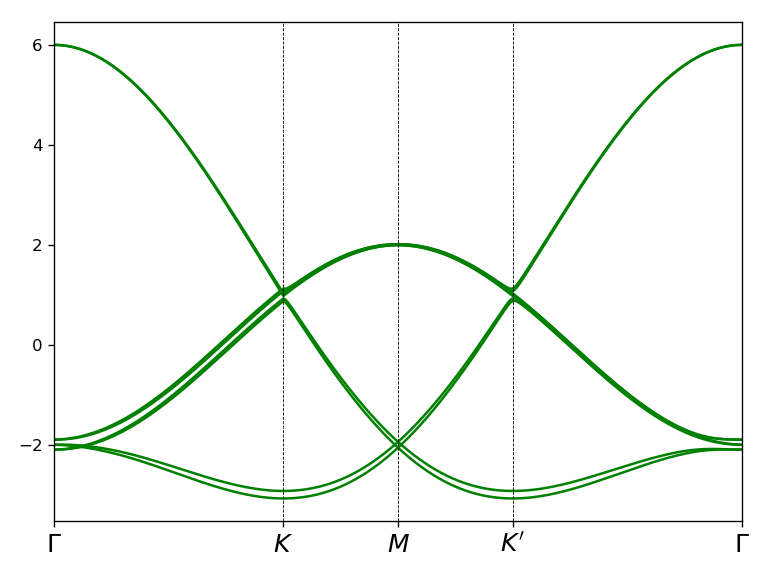

[0.         0.66666667 1.         1.33333333 2.        ]


In [4]:
fig, ax = plt.subplots()
Sim.plot_bands(ax)
fig.tight_layout()
fig.savefig("tests/banda_path.png")
plt.show()



## Example of pytb Use: Berry curvature around Dirac Cones
### Compute Berry phase around Dirac cone in graphene with staggered onsite term delta

In [9]:


# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model = pytb.tb_model(2,2,lat,orb)

# set model parameters
delta=-0.1 # small staggered onsite term
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# print tight-binding model
my_model.display()



---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>       0.1
 #  1  ===>      -0.1
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774



Berry phase along circle with radius:  0.05
  centered at k-point:  [0.33333333 0.66666667]
  for band 0 equals    :  0.0006584923581668132
  for band 1 equals    :  -0.00120061905340825
  for both bands equals:  1.5668182881087593e-09

Berry flux on square patch with length:  6.283185307179586
  centered at k-point:  [0 0]
  for band 0 equals    :  39.3467466376795
  for band 1 equals    :  7.788816896363773
  for both bands equals:  -170.4526312924694

(100, 100)


<IPython.core.display.Javascript object>


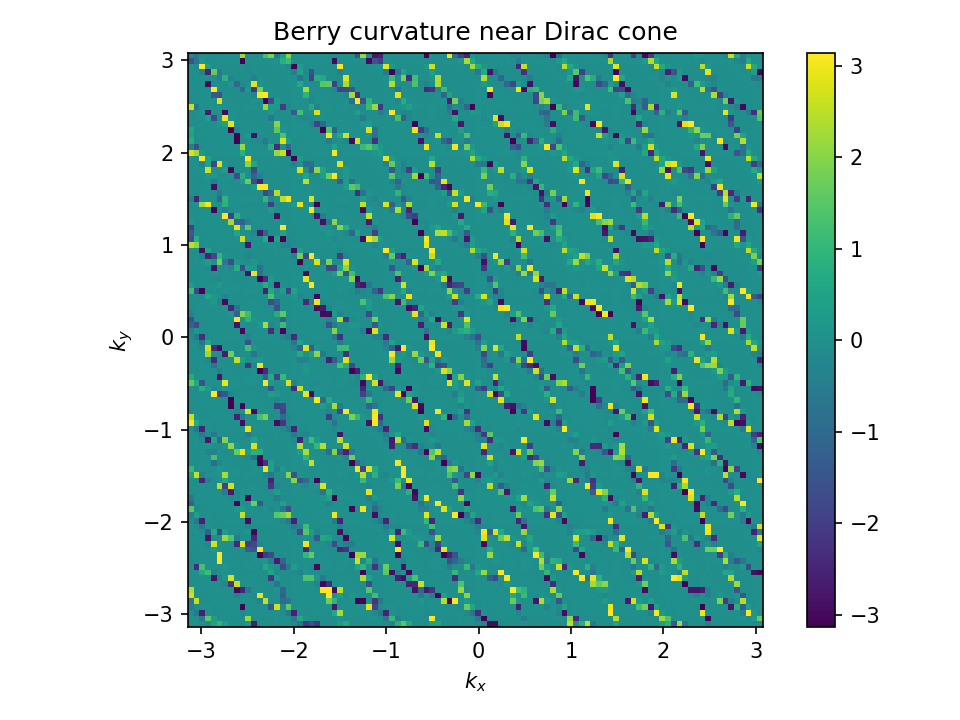

Done.



In [35]:
# construct circular path around Dirac cone
#   parameters of the path
my_model = Sim.model
circ_step = 31
circ_center = np.array([1.0/3.0,2.0/3.0])
circ_radius = 0.05
# one-dimensional wf_array to store wavefunctions on the path
w_circ = pytb.wf_array(my_model,[circ_step])
# now populate array with wavefunctions
for i in range(circ_step):
    # construct k-point coordinate on the path
    ang=2.0*np.pi*float(i)/float(circ_step-1)
    kpt=np.array([np.cos(ang)*circ_radius,np.sin(ang)*circ_radius])
    kpt+=circ_center
    # find eigenvectors at this k-point
    (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
    # store eigenvector into wf_array object
    w_circ[i]=evec
# make sure that first and last points are the same
w_circ[-1]=w_circ[0]

# compute Berry phase along circular path
print("Berry phase along circle with radius: ",circ_radius)
print("  centered at k-point: ",circ_center)
print("  for band 0 equals    : ", w_circ.berry_phase([0],0))
print("  for band 1 equals    : ", w_circ.berry_phase([1],0))
print("  for both bands equals: ", w_circ.berry_phase([0,1],0))
print()

# construct two-dimensional square patch covering the Dirac cone
#  parameters of the patch
square_step=101
square_center=np.array([1.0/3.0,1.0/3.0])
square_center = np.array([0, 0])
square_length = 2 * np.pi
# two-dimensional wf_array to store wavefunctions on the path
w_square= pytb.wf_array(my_model,[square_step,square_step])
all_kpt=np.zeros((square_step,square_step,2))
# now populate array with wavefunctions
for i in range(square_step):
    for j in range(square_step):
        # construct k-point on the square patch
        kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
                      square_length*(-0.5+float(j)/float(square_step-1))])
        kpt+=square_center
        # store k-points for plotting
        all_kpt[i,j,:]=kpt
        # find eigenvectors at this k-point
        (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
        # store eigenvector into wf_array object
        w_square[i,j]=evec

# compute Berry flux on this square patch
print("Berry flux on square patch with length: ",square_length)
print("  centered at k-point: ",square_center)
print("  for band 0 equals    : ", w_square.berry_flux([0]))
print("  for band 1 equals    : ", w_square.berry_flux([1]))
print("  for both bands equals: ", w_square.berry_flux([0,1]))
print()

# also plot Berry phase on each small plaquette of the mesh
plaq=w_square.berry_flux([4],individual_phases=True)
#
print(np.shape(plaq))
fig, ax = plt.subplots()
img = ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")

fig.colorbar(img)
fig.tight_layout()
fig.savefig("cone_phases.pdf")

print('Done.\n')

(199, 199)


<IPython.core.display.Javascript object>


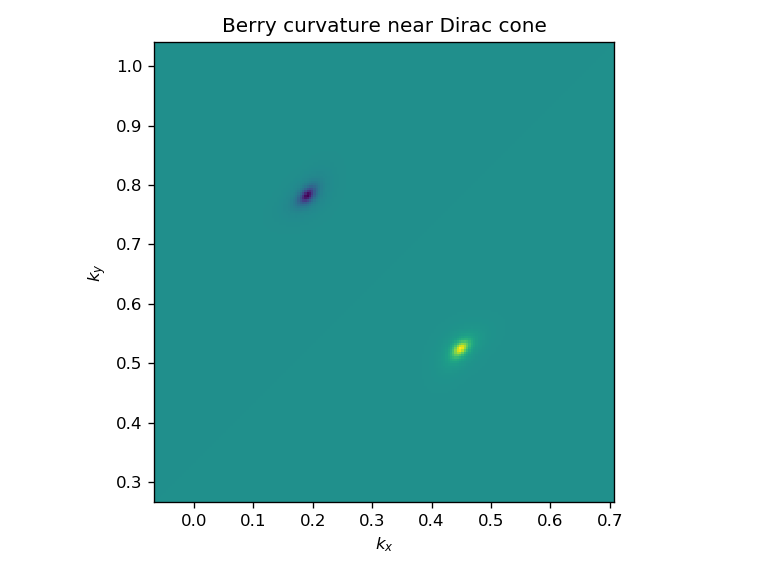

Done.



In [17]:
w_square= pytb.wf_array(my_model,[200,200])
w_square.solve_on_grid([0,0])

plaq=w_square.berry_flux([1],individual_phases=True)
#
print(np.shape(plaq))
fig, ax = plt.subplots()
ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
fig.tight_layout()
#fig.savefig("cone_phases.pdf")

print('Done.\n')

## Interpolation of Berry curvature, to plot in (kx, ky) basis

In [33]:
nk = 100
index_band = 4
b1, b2 = Sim.rlat[0], Sim.rlat[1]
k = np.linspace(0, 1, num=nk-1, endpoint=False)
k1, k2 = np.meshgrid(k, k)
k1 = k1.T.reshape(-1)
k2 = k2.T.reshape(-1)
kx = k1 * b1[0] + k2 * b2[0]
ky = k1 * b1[1] + k2 * b2[1]
# We add 4 BZ
kx = np.concatenate((kx, kx -b1[0], kx-b2[0], kx - b1[0]-b2[0]))
ky = np.concatenate((ky, ky -b1[1], ky-b2[1], ky - b1[1]-b2[1]))


w_square= pytb.wf_array(Sim.model,[nk, nk])
w_square.solve_on_grid([0,0])

berry_curv = w_square.berry_flux([index_band],individual_phases=True)
berry_curv = berry_curv.reshape(-1)
berry_curv = np.concatenate((berry_curv, berry_curv, berry_curv, berry_curv))



In [34]:
#f = interp.interp2d(kx, ky, berry_curv)
fig, ax = plt.subplots()
img = ax.imshow(berry_curv.T, origin="lower")
fig.colorbar(img)
ax.set_xlabel("$k_x$", fontsize=15)
ax.set_ylabel("$k_y$", fontsize=15)

/home/orion178/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=188,213 m=39204 fp=387.496952 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<IPython.core.display.Javascript object>


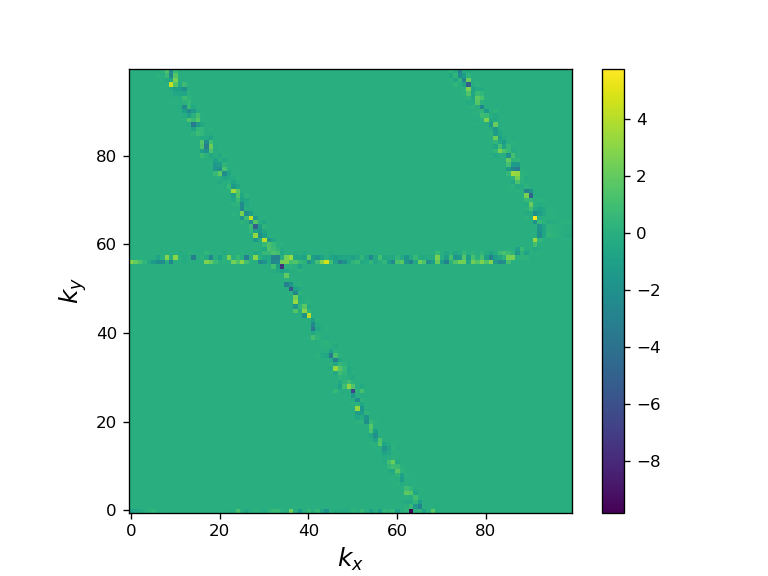

Text(0,0.5,'$k_y$')

In [51]:
k_cart = np.linspace(0.00, 2.0*np.pi, 100)
Kx, Ky = np.meshgrid(k_cart,k_cart)
berry_curv_cart = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        berry_curv_cart[i, j] = f(Kx[i, j], Ky[i, j])
        
fig, ax = plt.subplots()
img = ax.imshow(berry_curv_cart, origin="lower")
fig.colorbar(img)
ax.set_xlabel("$k_x$", fontsize=15)
ax.set_ylabel("$k_y$", fontsize=15)

In [52]:
Sim.rlat[0]

array([ 6.28318531,  3.62759873, -0.        ])

In [54]:
Sim.rlat[1]

array([0.        , 7.25519746, 0.        ])

<IPython.core.display.Javascript object>


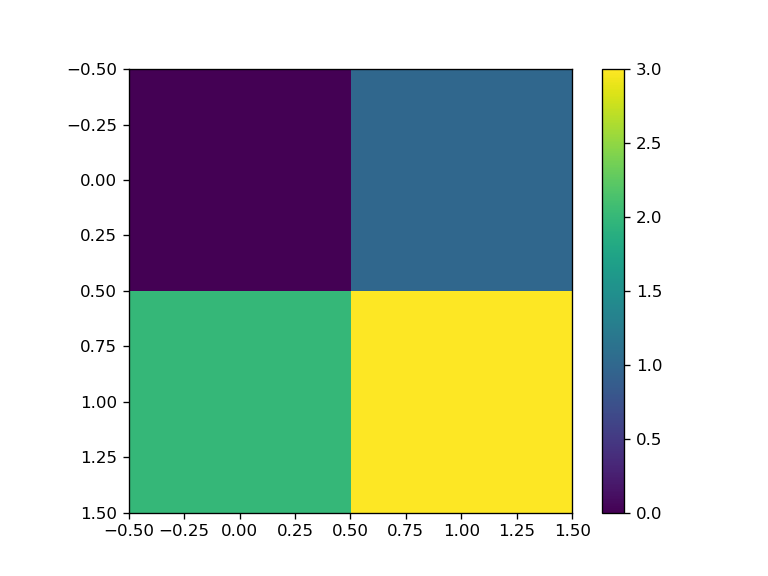

<IPython.core.display.Javascript object>


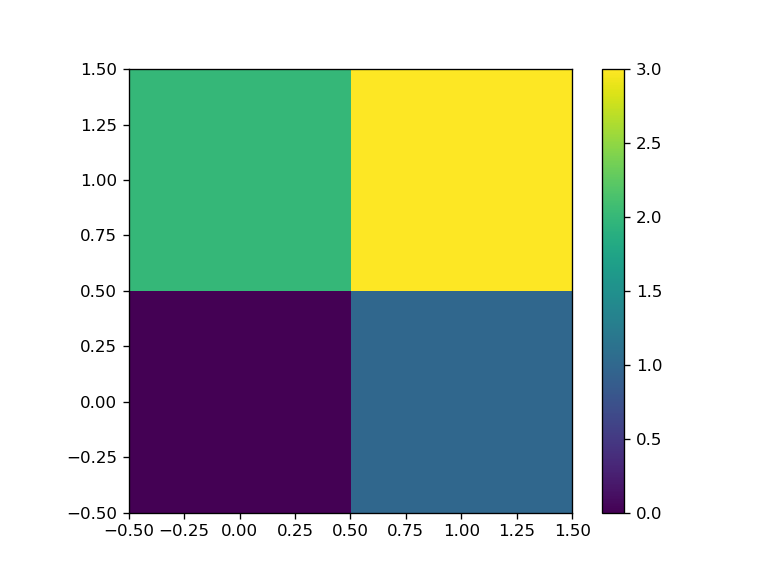

In [57]:
fig, ax = plt.subplots()
arr = np.array([[0,1],[2,3]])
img = ax.imshow(arr, origin="upper")
fig.colorbar(img)

fig2, ax2 = plt.subplots()
img2 = ax2.imshow(arr, origin="lower")
fig2.colorbar(img2)
plt.show()

<IPython.core.display.Javascript object>


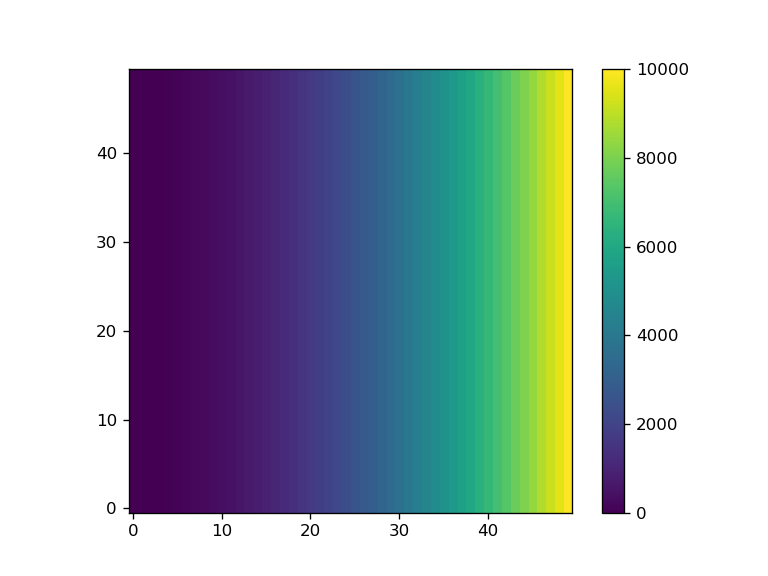

In [65]:
arr = np.linspace(0, 100, 50)
x, y = np.meshgrid(arr, arr)
f = x**2
fig, ax = plt.subplots()
img = ax.imshow(f, origin="lower")
fig.colorbar(img)

In [6]:
-1.33 % 1

0.6699999999999999

In [7]:
np.array([1.3, -0.2]) % 1

array([0.3, 0.8])

In [5]:
5/7

0.7142857142857143

In [ ]:
for i in range(n):
    for j in range(a):
        precio_0 = tensor_simulaciones[i, 0, j]
        precio_umbral = precio_0 * 1.1
        for t in range(T):
            precio_t = tensor_simulaciones[i, t, j]
            if precio_t > precio_umbral:
                nuevos_precios = tensor_simulaciones[i, t, j] * (1.02)**np.range(T-t)  # 0, 1, 2, .---- T-t-1
				tensor_simulaciones[i, t:T, j] = nuevos_precios
                break
renta = cantidad_acciones @ tensor_simulacionesones[:, T, :] # o algo así, igual que en estrategia 1 y 2.







a

In [27]:
taza_anual = 1.02
taza_diaria =taza_anual **(1/360)

In [30]:
taza_diaria* taza_diaria * taza_diaria

1.0001650355109966

In [32]:
taza_diaria**1

1.0055158865970801

In [33]:
for i in range(10):
    if i >7:
        print("i={}".format(i))
        break
    print("i era menor o igual a 7")

i era menor o igual a 7
i era menor o igual a 7
i era menor o igual a 7
i era menor o igual a 7
i era menor o igual a 7
i era menor o igual a 7
i era menor o igual a 7
i era menor o igual a 7
i=8


In [45]:
int(-10.3)
x=-10.333
len(str(int(np.abs(x))))

2